#I. Perkenalan
Nama: Hafidz Muta'ali

Batch: FTDS 006

Bank Term Deposit Classification:

The classification goal is to predict if the client will subscribe a term deposit (variable y)

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
## bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 
'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


#II. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

%matplotlib inline

#III. Data Loading

In [ ]:
dfraw = pd.read_csv('https://raw.githubusercontent.com/hafidzali04/Bank-Term-Deposit-/main/bank-additional-full.csv', sep = ';')
pd.set_option('display.max_columns', None)
dfraw

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#IV. Data Cleaning

In [ ]:
# Menghapus kolom duration berdasarkan deskripsi data , untuk mendapat  realistic predictive model kolom ini harus di drop

dfraw = dfraw.drop('duration', axis = 1)
dfraw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
dfraw.info() #Check Tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
#Check Missing Values
dfraw.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
#Check Duplicate
dfraw.duplicated().sum()

1784

In [ ]:
dfraw = dfraw.drop_duplicates(keep='first') #Menghapus data duplicate
dfraw.reset_index(drop = True, inplace = True)
dfraw.shape

(39404, 20)

In [ ]:
dfraw['y'].value_counts()

no     34806
yes     4598
Name: y, dtype: int64

In [ ]:
# Mengubah value dari target menjadi numerikal
dfraw['y'] = dfraw['y'].replace({'no': 0, 'yes':1})

In [ ]:
# Checking the unique values of categorical columns
for column in dfraw.select_dtypes(include=['object']).columns:
    print(column)
    print(dfraw[column].unique())
    print('\n')

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


marital
['married' 'single' 'divorced' 'unknown']


education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


default
['no' 'unknown' 'yes']


housing
['no' 'yes' 'unknown']


loan
['no' 'yes' 'unknown']


contact
['telephone' 'cellular']


month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']


poutcome
['nonexistent' 'failure' 'success']




In [ ]:
dfraw['job'].value_counts()

admin.           9873
blue-collar      8835
technician       6404
services         3801
management       2820
retired          1683
entrepreneur     1405
self-employed    1386
housemaid        1028
unemployed        992
student           852
unknown           325
Name: job, dtype: int64

In [ ]:
dfraw['marital'].value_counts()

married     23869
single      10997
divorced     4459
unknown        79
Name: marital, dtype: int64

In [ ]:
dfraw['education'].value_counts()

university.degree      11561
high.school             9121
basic.9y                5785
professional.course     5018
basic.4y                3993
basic.6y                2222
unknown                 1686
illiterate                18
Name: education, dtype: int64

In [ ]:
dfraw['housing'].value_counts()

yes        20561
no         17863
unknown      980
Name: housing, dtype: int64

In [ ]:
dfraw['default'].value_counts()

no         31135
unknown     8266
yes            3
Name: default, dtype: int64

In [ ]:
dfraw['loan'].value_counts()

no         32248
yes         6176
unknown      980
Name: loan, dtype: int64

In [ ]:
dfraw.shape

(39404, 20)

* Untuk Value unknown pada kolom housing default dan loan akan di replace ke value yang paling banyak. (value unknown pada housing akan direplace menjadi yes)
* untuk value unknown pada kolom job marital dan education akan di drop

In [ ]:
dfraw['housing'] = dfraw['housing'].replace(['unknown'], 'yes')
dfraw['loan'] = dfraw['loan'].replace(['unknown'], 'no')
dfraw['default'] = dfraw['default'].replace(['unknown'], 'no')

In [ ]:
dfraw.drop(dfraw.index[(dfraw["job"] == "unknown")],axis=0,inplace=True)
dfraw.drop(dfraw.index[(dfraw["marital"] == "unknown")],axis=0,inplace=True)
dfraw.drop(dfraw.index[(dfraw["education"] == "unknown")],axis=0,inplace=True)

In [ ]:
dfraw.shape

(37455, 20)

In [ ]:
for column in dfraw.select_dtypes(include=['object']).columns:
    print(column)
    print(dfraw[column].unique())
    print('\n')

job
['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']


marital
['married' 'single' 'divorced']


education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']


default
['no' 'yes']


housing
['no' 'yes']


loan
['no' 'yes']


contact
['telephone' 'cellular']


month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']


poutcome
['nonexistent' 'failure' 'success']




In [ ]:
dfclean = dfraw.copy()
dfclean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#V. EDA

In [ ]:
dfclean[dfclean['y'] == 1].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.0
mean,40.767361,2.056944,794.633102,0.481713,-1.211088,93.356523,-39.842569,2.148146,5096.426505,1.0
std,13.443778,1.651088,401.535668,0.846189,1.629871,0.676833,6.143594,1.751382,87.778151,0.0
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.0
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.859000,5017.500000,1.0
50%,37.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000,1.0
75%,49.000000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.855000,5191.000000,1.0
max,98.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.0


dari describe secara keseluruhan terhadap kolom numerik dapat diambil kesimpulan:
* umur termuda yang melakukan deposit adalah 17 tahun dan tertua adalah 98 tahun, 
*  rata rata yang melaukan term deposit ada di 40 tahun
* dari campaign minimal 1 kali campaign untuk mendapatkan pelanggan deposit dan paling banyak 23 kali campaign untuk mendapat pelanggan deposit


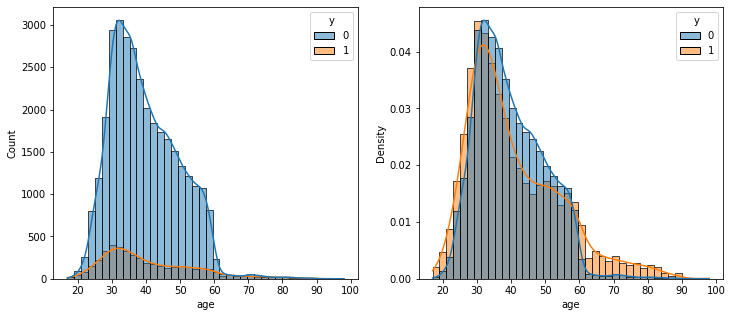

In [ ]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x='age', hue='y', data=dfclean, kde=True, bins=40)
plt.subplot(1,2,2)
sns.histplot(x='age', hue='y', data=dfclean,stat="density", common_norm=False, kde=True, bins=40)
plt.show()

In [ ]:
dfclean[dfclean['y'] == 1].astype('object').describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320.0,4320.000,4320.0,4320.000,4320.0,4320
unique,74,11,3,7,1,2,2,2,10,5,17,26,7,3,10.0,26.000,26.0,287.000,11.0,1
top,31,admin.,married,university.degree,no,yes,no,cellular,may,thu,1,999,0,nonexistent,-1.8,92.893,-46.2,4.962,5099.1,1
freq,207,1295,2384,1635,4320,2427,3682,3583,844,981,2121,3431,2944,2944,1355.0,507.000,507.0,135.000,1029.0,4320


dari describe data kategorical yang melakukan deposit dapat diambil kesimpulan: 
*  job terbanyak adalah admin
* marital status terbanyak adalah married
* education degree terbanyak adalah university degree

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


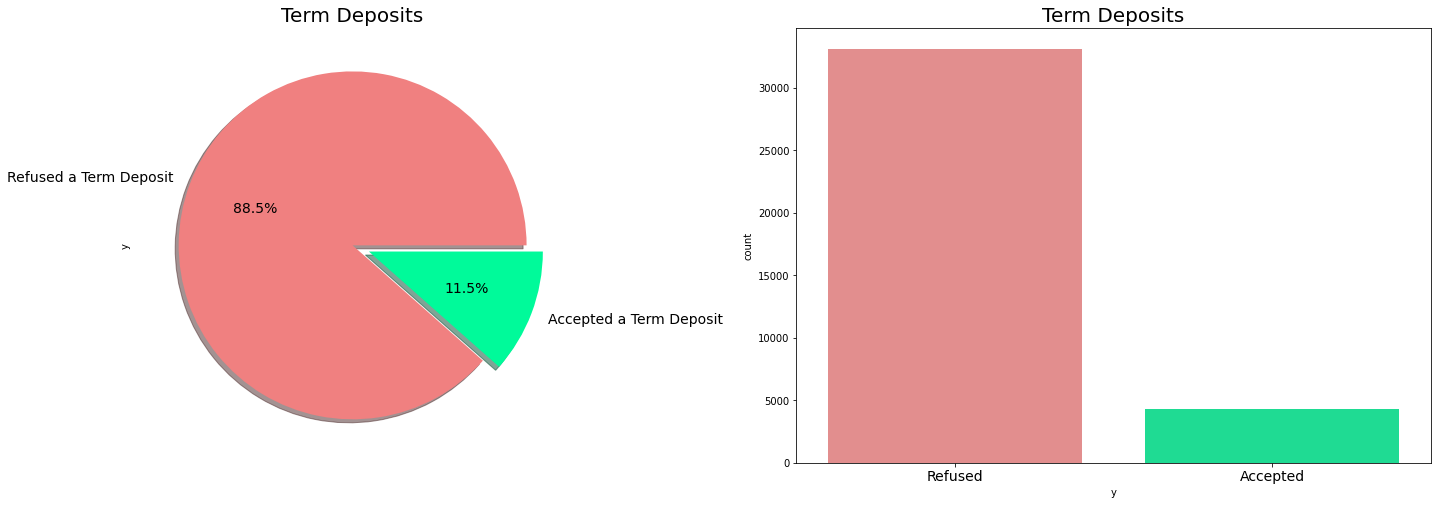

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,8))
colors=["#F08080", "#00FA9A"]
labels = 'Refused a Term Deposit', 'Accepted a Term Deposit'
dfclean['y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Term Deposits', fontsize=20)
sns.countplot('y',data=dfclean,ax=ax[1], palette=colors)
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['Refused', 'Accepted'], fontsize=14)
plt.show()

* Dari keseluruhan data banyak yang menolak term deposit 

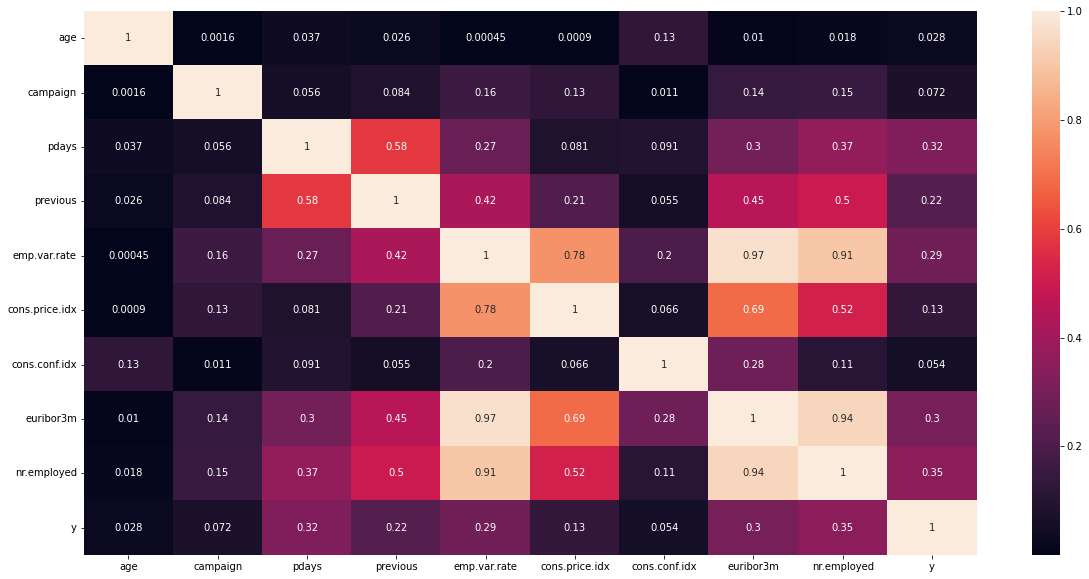

In [ ]:
#heatmap untuk pengecekan correlation
plt.figure(figsize=(20, 10))
sns.heatmap(dfclean.corr().abs(),  annot=True)
plt.show()

* Korelasi tertinggi terhadap kolom y ada pada kolom nr.employed dan terendah ada pada age

#VI. Data Preprocessing

In [ ]:
X = dfclean.drop('y', axis = 1) #Fitur
y = dfclean['y'] #Target

In [ ]:
#Split Data menjadi 3 bagian
X1, X_test, y1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

print('Presentase untuk data training   :', '%.2f' % ((len(X_train)/len(X))*100), '%')
print('Presentase untuk data evaluation :', '%.2f' % ((len(X_val)/len(X))*100), '%')
print('Presentase untuk data test       :', '%.2f' % ((len(X_test)/len(X))*100), '%')
print()

print('Jumlah data training  :', X_train.shape[0])
print('Jumlah data validation:', X_val.shape[0])
print('Jumlah data test      :', X_test.shape[0])

Presentase untuk data training   : 56.00 %
Presentase untuk data evaluation : 24.00 %
Presentase untuk data test       : 20.00 %

Jumlah data training  : 20974
Jumlah data validation: 8990
Jumlah data test      : 7491


##Transform Data

In [ ]:
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
# Membuat pipeline untuk kolom numerik
numerical_pipeline = Pipeline([
    ('select_numeric', OldDataFrameSelector(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                                            'euribor3m', 'nr.employed'])),
    ('scaler', MinMaxScaler()),
])

# Membuat pipeline untuk kolom kategorikal
categorical_pipeline = Pipeline([
    ('select_cat', OldDataFrameSelector(['job', 'marital', 'education', 'default','housing','loan', 'contact',
                                        'month', 'day_of_week', 'poutcome'])),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

# Menggabungkan kedua pipelines
preprocess_pipeline = FeatureUnion(transformer_list=[
        ('numerical_pipeline', numerical_pipeline),
        ('categorical_pipeline', categorical_pipeline),
    ])

In [ ]:
X_train = preprocess_pipeline.fit_transform(X_train)
X_train

array([[0.25925926, 0.03636364, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19753086, 0.10909091, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.49382716, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17283951, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.25925926, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.09876543, 0.01818182, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X_val = preprocess_pipeline.fit_transform(X_val)
X_val

array([[0.33802817, 0.2       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.47887324, 0.25      , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1971831 , 0.05      , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.57746479, 0.15      , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.18309859, 0.1       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.49295775, 0.025     , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X_test = preprocess_pipeline.fit_transform(X_test)
X_test

array([[0.11538462, 0.14285714, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.53846154, 0.04761905, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.15384615, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.34615385, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1025641 , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.28205128, 0.02380952, 1.        , ..., 0.        , 1.        ,
        0.        ]])

#VII. Pendefisian Model

##GridSearch Hyperparameter Tuning

###Logistic Regression

In [ ]:
params = {
    'C': [0.01, 0.1, 0.5],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}


model_lr = LogisticRegression(random_state = 42)
lr_search = GridSearchCV(model_lr, params, cv = 5, scoring = 'roc_auc', return_train_score=True)
%time lr_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CPU times: user 15.1 s, sys: 5.9 s, total: 21 s
Wall time: 13.8 s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("Best score accuracy: {:.2f}".format(lr_search.best_score_))
print("Best parameters: {}".format(lr_search.best_params_))

Best score accuracy: 0.79
Best parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr_best= lr_search.best_estimator_
lr_best

LogisticRegression(C=0.5, penalty='l1', random_state=42, solver='liblinear')

### SVM

In [ ]:
params = {
    'C': [0.5, 1.0]
}


model_svm = SVC(kernel='rbf', random_state = 42)
svm_search = GridSearchCV(model_svm, params, cv = 5, scoring = 'roc_auc', return_train_score=True)
%time svm_search.fit(X_train, y_train)

CPU times: user 4min 16s, sys: 949 ms, total: 4min 17s
Wall time: 4min 24s


GridSearchCV(cv=5, estimator=SVC(random_state=42), param_grid={'C': [0.5, 1.0]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("Best score accuracy: {:.2f}".format(svm_search.best_score_))
print("Best parameters: {}".format(svm_search.best_params_))

Best score accuracy: 0.71
Best parameters: {'C': 0.5}


In [ ]:
svm_best= svm_search.best_estimator_
svm_best

SVC(C=0.5, random_state=42)

###Decision Tree

In [ ]:
params = {
    'criterion':['gini','entropy'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [5, 25, 100],
    'min_samples_leaf' : [1, 10, 30],
    'max_features': ['auto', 'log2']
}


model_dt = DecisionTreeClassifier(random_state = 42)
dt_search = GridSearchCV(model_dt, params, cv = 5, scoring ='roc_auc', return_train_score=True)
%time dt_search.fit(X_train, y_train)

CPU times: user 20.7 s, sys: 226 ms, total: 20.9 s
Wall time: 21 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 10, 30],
                         'min_samples_split': [5, 25, 100]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("Best score accuracy: {:.2f}".format(dt_search.best_score_))
print("Best parameters: {}".format(dt_search.best_params_))

Best score accuracy: 0.78
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 100}


In [ ]:
dt_best= dt_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=100,
                       random_state=42)

###Random Forest

In [ ]:
params = {
    'criterion':['gini','entropy'],
    'max_depth': [5, 15, 25],
    'min_samples_split': [2, 45],
    'min_samples_leaf' : [5, 25],
    'n_estimators': [50, 100, 200]
}



model_rf = RandomForestClassifier(random_state = 42)
rf_search = GridSearchCV(model_rf, params, cv = 5, scoring = 'roc_auc', return_train_score=True)
%time rf_search.fit(X_train, y_train)

CPU times: user 10min 29s, sys: 2.38 s, total: 10min 32s
Wall time: 10min 32s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 25], 'min_samples_leaf': [5, 25],
                         'min_samples_split': [2, 45],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("Best score accuracy: {:.2f}".format(rf_search.best_score_))
print("Best parameters: {}".format(rf_search.best_params_))

Best score accuracy: 0.80
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 45, 'n_estimators': 200}


In [ ]:
rf_best= rf_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=45, n_estimators=200, random_state=42)

###KNN

In [ ]:
params = {
    'n_neighbors': [5, 10],
    'metric': ['euclidean','minkowski']
}



model_knn = KNeighborsClassifier()
knn_search = GridSearchCV(model_knn, params, cv = 5, scoring = 'roc_auc', return_train_score=True)
%time knn_search.fit(X_train, y_train)

CPU times: user 2min 52s, sys: 13.5 s, total: 3min 5s
Wall time: 2min 30s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [5, 10]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("Best score accuracy: {:.2f}".format(knn_search.best_score_))
print("Best parameters: {}".format(knn_search.best_params_))

Best score accuracy: 0.72
Best parameters: {'metric': 'euclidean', 'n_neighbors': 10}


In [ ]:
knn_best= knn_search.best_estimator_
knn_best

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

###Naive Bayes

In [ ]:
from pandas.core.common import random_state
params = {
    'var_smoothing': [1e-9, 1e-5,1,5]
}



model_nb = GaussianNB()
nb_search = GridSearchCV(model_nb, params, cv = 5, scoring = 'roc_auc', return_train_score=True)
%time nb_search.fit(X_train, y_train)

CPU times: user 1.09 s, sys: 1.69 s, total: 2.77 s
Wall time: 2.79 s


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-05, 1, 5]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("Best score accuracy: {:.2f}".format(nb_search.best_score_))
print("Best parameters: {}".format(nb_search.best_params_))

Best score accuracy: 0.77
Best parameters: {'var_smoothing': 1}


In [ ]:
nb_best= nb_search.best_estimator_
nb_best

GaussianNB(var_smoothing=1)

###AdaBoost

In [ ]:
params = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100],
    'algorithm':['SAMME', 'SAMME.R']
}


model_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 10), random_state = 42)
ab_search = GridSearchCV(model_ab, params, cv = 5, scoring = 'roc_auc', return_train_score=True)
%time ab_search.fit(X_train, y_train)

CPU times: user 7min 46s, sys: 1.75 s, total: 7min 48s
Wall time: 7min 49s


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                          random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("Best score accuracy: {:.2f}".format(ab_search.best_score_))
print("Best parameters: {}".format(ab_search.best_params_))

Best score accuracy: 0.78
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}


In [ ]:
ab_best= ab_search.best_estimator_
ab_best

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.1, random_state=42)

##CrossValidation

In [ ]:
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes','AdaBoost']

In [ ]:
model_best=[lr_best,svm_best,dt_best,rf_best,knn_best,nb_best,ab_best]

In [ ]:
i = 0
for model in model_best:
    auc_score = cross_val_score(model, X_train, y_train, scoring = 'roc_auc', cv = 5)
    print(f'Cross Validation score {model_names[i]}:', '%.2f' % np.mean(auc_score))
    i += 1

Cross Validation score Logistic Regression: 0.79
Cross Validation score SVM: 0.71
Cross Validation score Decision Tree: 0.78
Cross Validation score Random Forest: 0.80
Cross Validation score K-Nearest Neighbors: 0.72
Cross Validation score Naive Bayes: 0.77
Cross Validation score AdaBoost: 0.78


#VIII. Evaluasi Model

In [ ]:
# Model Evaluasi menggunakan data val

print('1. Logistic Regression:')
%time predict_lr = lr_best.predict(X_val)
print(classification_report(y_val, predict_lr))
print('--------------------------------------------------\n')

print('2. SVM:')
%time predict_svm = svm_best.predict(X_val)
print(classification_report(y_val, predict_svm))
print('--------------------------------------------------\n')

print('3. Decision Tree:')
%time predict_dt = dt_best.predict(X_val)
print(classification_report(y_val, predict_dt))
print('--------------------------------------------------\n')

print('4. Random Forest:')
%time predict_rf = rf_best.predict(X_val)
print(classification_report(y_val, predict_rf))
print('--------------------------------------------------\n')

print('5. KNN:')
%time predict_knn = knn_best.predict(X_val)
print(classification_report(y_val, predict_knn))
print('--------------------------------------------------\n')

print('6. Naive Bayes:')
%time predict_nb = nb_best.predict(X_val)
print(classification_report(y_val, predict_nb))
print('--------------------------------------------------\n')

print('7. AdaBoost:')
%time predict_ab = ab_best.predict(X_val)
print(classification_report(y_val, predict_ab))
print('--------------------------------------------------\n')

1. Logistic Regression:
CPU times: user 2.35 ms, sys: 0 ns, total: 2.35 ms
Wall time: 1.73 ms
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7929
           1       0.64      0.20      0.31      1061

    accuracy                           0.89      8990
   macro avg       0.77      0.59      0.63      8990
weighted avg       0.87      0.89      0.87      8990

--------------------------------------------------

2. SVM:
CPU times: user 7.86 s, sys: 30.9 ms, total: 7.89 s
Wall time: 8.76 s
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7929
           1       0.62      0.18      0.28      1061

    accuracy                           0.89      8990
   macro avg       0.76      0.58      0.61      8990
weighted avg       0.87      0.89      0.86      8990

--------------------------------------------------

3. Decision Tree:
CPU times: user 1.96 ms, sys: 1.98 ms, total: 3.94 m

#IX. Model Inference

In [ ]:
#  Model Inference menggunakan  data test

print('1. Logistic Regression:')
%time predict_lr = lr_best.predict(X_test)
print(classification_report(y_test, predict_lr))
print('--------------------------------------------------\n')

print('2. SVM:')
%time predict_svm = svm_best.predict(X_test)
print(classification_report(y_test, predict_svm))
print('--------------------------------------------------\n')


print('3. Decision Tree:')
%time predict_dt = dt_best.predict(X_test)
print(classification_report(y_test, predict_dt))
print('--------------------------------------------------\n')

print('4. Random Forest:')
%time predict_rf = rf_best.predict(X_test)
print(classification_report(y_test, predict_rf))
print('--------------------------------------------------\n')

print('5. KNN:')
%time predict_knn = knn_best.predict(X_test)
print(classification_report(y_test, predict_knn))
print('--------------------------------------------------\n')

print('6. Naive Bayes:')
%time predict_nb = nb_best.predict(X_test)
print(classification_report(y_test, predict_nb))
print('--------------------------------------------------\n')

print('7. AdaBoost:')
%time predict_ab = ab_best.predict(X_test)
print(classification_report(y_test, predict_ab))
print('--------------------------------------------------\n')

1. Logistic Regression:
CPU times: user 2.79 ms, sys: 23 µs, total: 2.81 ms
Wall time: 2.47 ms
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6624
           1       0.67      0.25      0.36       867

    accuracy                           0.90      7491
   macro avg       0.79      0.62      0.65      7491
weighted avg       0.88      0.90      0.88      7491

--------------------------------------------------

2. SVM:
CPU times: user 7.23 s, sys: 45.7 ms, total: 7.28 s
Wall time: 7.6 s
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      6624
           1       0.70      0.21      0.32       867

    accuracy                           0.90      7491
   macro avg       0.80      0.60      0.63      7491
weighted avg       0.88      0.90      0.87      7491

--------------------------------------------------

3. Decision Tree:
CPU times: user 2.68 ms, sys: 0 ns, total: 2.68 ms
W

#Kesimpulan

Precision and Recall:
* Recall: Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect.

* Precision: Means how sure is the prediction of our model that the actual label is a "Yes".

## Pembagian Data :


*   Data dibagi menjadi 3 bagian yaitu data train, data validation dan data test dengan ratio 0.2 untuk data test, dan 0.3 untuk data train dan validation
*   Masing masing persentase nya adalah :

Presentase untuk data training   : 56.00 %

Presentase untuk data evaluation : 24.00 %

Presentase untuk data test       : 20.00 %



---


## Pendefisian Model :


1.   GridSearchCV
        * Logistic Regression
              Pada Model Logreg didapat kan model yang paling optimal adalah  parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'} 
              dan  Best score accuracy: 0.79 dalam waktu cukup singkat yaitu 13.8 s
        * SVM
              Pada Model SVM didapat kan model yang paling optimal adalah Best parameters: {'C': 0.5} dengan kernel rbf 
              dan Best score accuracy: 0.71 dalam waktu 4min 24s
        * Decision Tree
              Pada Model Decision Tree didapat kan model yang paling optimal adalah Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 100}
              dan Best score accuracy: 0.78 dalam waktu 21 s
        * Random Forest
              Pada Model Random Forest didapat kan model yang paling optimal adalah Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 45, 'n_estimators': 200} 
              dan Best score accuracy: 0.80 dalam waktu 10min 32s
        * KNN
              Pada Model KNN didapat kan model yang paling optimal adalah Best parameters: {'metric': 'euclidean', 'n_neighbors': 10} 
              dan Best score accuracy: 0.72 dalam waktu 2min 30s
        * Naive Bayes
              Pada Model Naive Bayes didapat kan model yang paling optimal adalah Best parameters: {'var_smoothing': 1}
              dan Best score accuracy: 0.77 dalam waktu 2.79 s
        * AdaBoost
              Pada Model AdaBoost didapat kan model yang paling optimal adalah Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
              dan Best score accuracy: 0.78 dalam waktu 7min 49s

2.   CrossValidation
      * Cross Validation score Logistic Regression: 0.79
      * Cross Validation score SVM: 0.71
      * Cross Validation score Decision Tree: 0.78
      * Cross Validation score Random Forest: 0.80
      * Cross Validation score K-Nearest Neighbors: 0.72
      * Cross Validation score Naive Bayes: 0.77
      * Cross Validation score AdaBoost: 0.78

* Dari segi akurasi RandomForest memiliki akurasi training tertinggi yaitu 0.80 dan yang terendah adalah SVM yaitu 0.72
* Dari segi waktu Naive Bayes memiliki waktu komputasi training tercepat yaitu 1.11s sedangkan Random Forest memiliki waktu komputasi training terlama yaitu 9min 28s
* Hasil Akurasi setaip algoritma pada GridsearchCV dan CrossValidation adalah sama


---
## Evaluasi Model
Menggunakan data Validation maka didapat hasil sebagai berikut:
* Dari segi akurasi setiap algoritma memiliki akurasi yang sama yaitu 0.89
* Dari segi presisi algoritma Logistic Regression memiliki precision terhadap target 1(yes) terbaik yaitu  0.64  di ikuti RandomForest sebesar  0.63 dan SVM 0.62
* Dari segi Recall dan F1 score masing masing algoritma meendapat nilai yang rendah terhadap target 1(yes)  untuk recall 0.15 - 0.26 dan untuk f1 score 0.23 - 0.36 


---
##Model Inference
Menggunakan data test maka didapat hasil sebagai berikut:

* Dari segi akurasi setiap algoritma memiliki akurasi yang sama yaitu 0.90, kecuali algoritma KNN yaitu 0.89
* Dari segi presisi algoritma SVM memiliki precision terhadap target 1(yes) terbaik yaitu 0.70 di ikuti RandomForest sebesar 0.69 dan Logistic Regression 0.67
* Dari segi Recall dan F1 score masing masing algoritma meendapat nilai yang rendah terhadap target 1(yes) untuk recall 0.18 - 0.29 dan untuk f1 score 0.28 - 0.40
---
Berdasarkan Hasil dari Evaluasi Model dan Model Inference didapatkan bahwa model SVM dan Random Forest adalah model terbaik yang bisa digunakan untuk prediksi Term Deposit dikarenakan precisi score dan accuracy score yang didapat cukup tinggi

